Load saved data

In [2]:
import tensorflow as tf
import numpy as np
from keras.utils import np_utils
X=np.load("X.npy")
X_cat=np_utils.to_categorical(X,num_classes=15)
X_reg=np.load("X_reg.npy")

Y=np.load("Y.npy")
#Y=np_utils.to_categorical(Y,num_classes=4)
from sklearn.model_selection import train_test_split
X_train, X_test,X_cat_train,X_cat_test,Y_train, Y_test = train_test_split(
    X_reg,X_cat,Y, test_size=0.1, random_state=42)

In [1]:
import tensorflow as tf
from tensorflow import keras
import keras.backend as K
from tensorflow.keras import layers
from game2048.NNagent import NNAgent
from game2048.game import Game
tf.keras.backend.clear_session()
game = Game(4, random=False)
train=NNAgent(game,training=True,stateful=False)


model=train.model
model.summary()

Using TensorFlow backend.


Loaded expectmax lib for 2048: /home/woaiwinnie2/2048-api-master/game2048/expectimax/bin/2048.so
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
cat_input (InputLayer)          [(None, None, 4, 4,  0                                            
__________________________________________________________________________________________________
time_distributed (TimeDistribut (None, None, 4, 3, 1 3968        cat_input[0][0]                  
__________________________________________________________________________________________________
time_distributed_1 (TimeDistrib (None, None, 3, 4, 1 3968        cat_input[0][0]                  
__________________________________________________________________________________________________
time_distributed_2 (TimeDistrib (None, None, 4, 2, 1 32896       time_distributed[0][0]         

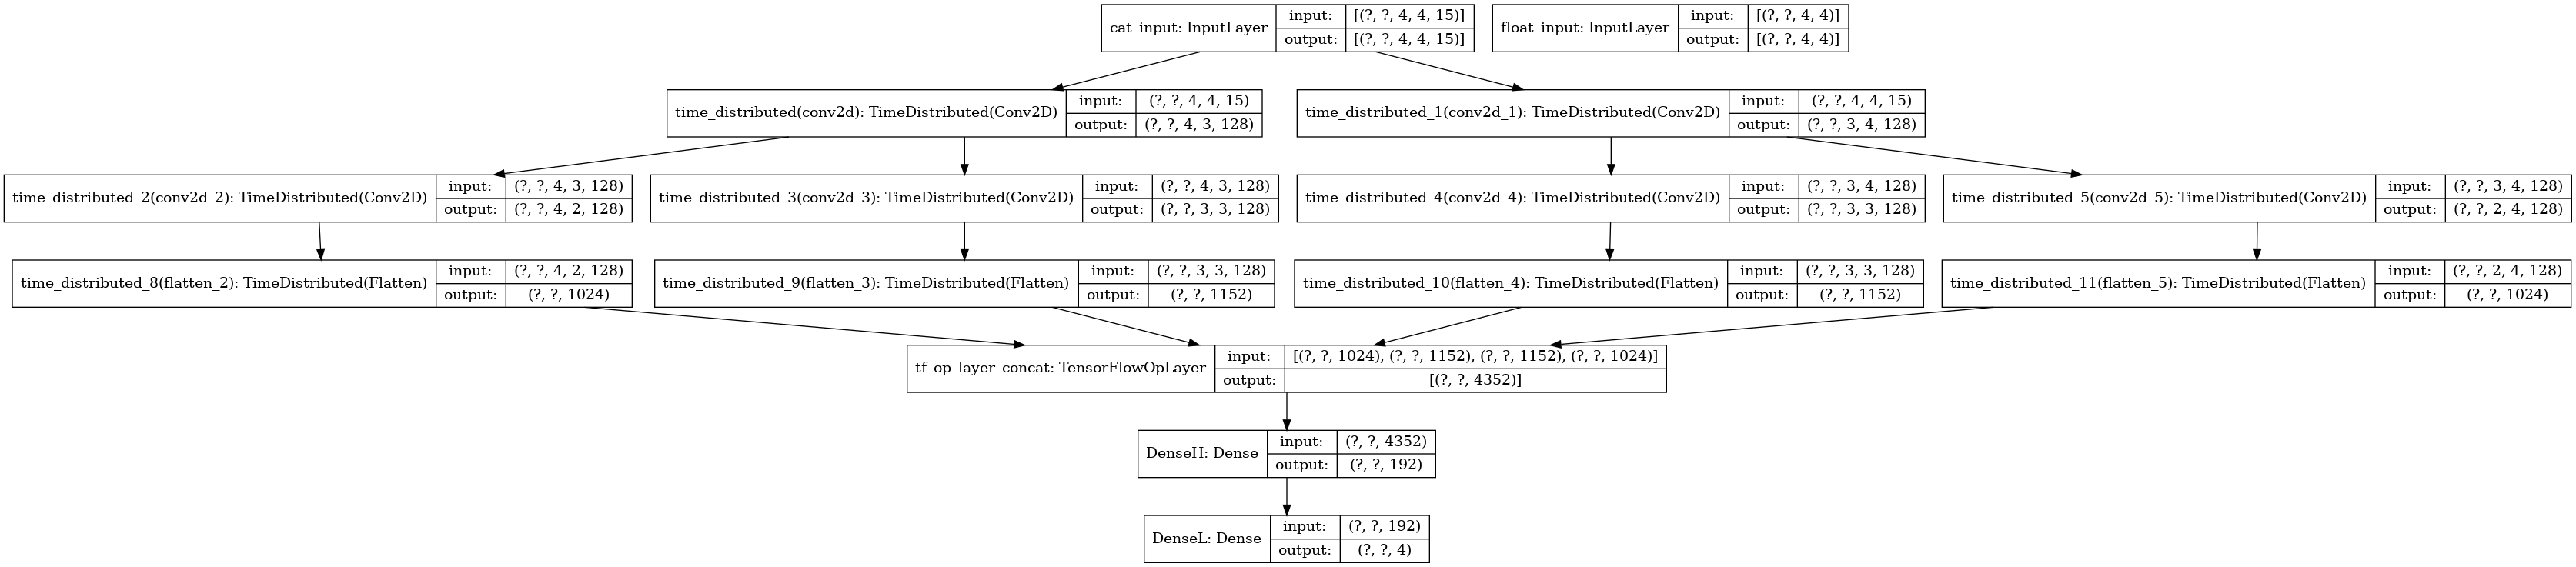

In [3]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96)
from IPython.display import Image
Image("model.png")

In [4]:
model.fit([X_train,X_cat_train],Y_train,
         batch_size=100,
          epochs=500,
          verbose=1)

Train on 9000 samples
Epoch 1/500
9000/9000 [==============================] - 28s 3ms/sample - loss: 1.2642 - CategoricalAccuracy: 0.3828
Epoch 2/500
9000/9000 [==============================] - 24s 3ms/sample - loss: 1.1316 - CategoricalAccuracy: 0.4252
Epoch 3/500
9000/9000 [==============================] - 24s 3ms/sample - loss: 1.0974 - CategoricalAccuracy: 0.4526
Epoch 4/500
9000/9000 [==============================] - 25s 3ms/sample - loss: 1.0759 - CategoricalAccuracy: 0.4639
Epoch 5/500
9000/9000 [==============================] - 25s 3ms/sample - loss: 1.0643 - CategoricalAccuracy: 0.4669
Epoch 6/500
9000/9000 [==============================] - 24s 3ms/sample - loss: 1.0465 - CategoricalAccuracy: 0.4775
Epoch 7/500
9000/9000 [==============================] - 23s 3ms/sample - loss: 1.0258 - CategoricalAccuracy: 0.4889
Epoch 8/500
9000/9000 [==============================] - 24s 3ms/sample - loss: 1.0040 - CategoricalAccuracy: 0.4973
Epoch 9/500
9000/9000 [===================

9000/9000 [==============================] - 24s 3ms/sample - loss: 0.8241 - CategoricalAccuracy: 0.5957
Epoch 140/500
9000/9000 [==============================] - 23s 3ms/sample - loss: 0.8120 - CategoricalAccuracy: 0.6000
Epoch 141/500
9000/9000 [==============================] - 23s 3ms/sample - loss: 0.8173 - CategoricalAccuracy: 0.5993
Epoch 142/500
9000/9000 [==============================] - 24s 3ms/sample - loss: 0.8266 - CategoricalAccuracy: 0.5969
Epoch 143/500
9000/9000 [==============================] - 24s 3ms/sample - loss: 0.8229 - CategoricalAccuracy: 0.5969
Epoch 144/500
9000/9000 [==============================] - 23s 3ms/sample - loss: 0.8149 - CategoricalAccuracy: 0.6001
Epoch 145/500
9000/9000 [==============================] - 24s 3ms/sample - loss: 0.8159 - CategoricalAccuracy: 0.5969
Epoch 146/500
9000/9000 [==============================] - 23s 3ms/sample - loss: 0.8130 - CategoricalAccuracy: 0.6008
Epoch 147/500
9000/9000 [==============================] - 23s

Epoch 208/500
9000/9000 [==============================] - 23s 3ms/sample - loss: 0.8123 - CategoricalAccuracy: 0.5995
Epoch 209/500
9000/9000 [==============================] - 23s 3ms/sample - loss: 0.7950 - CategoricalAccuracy: 0.6036
Epoch 210/500
9000/9000 [==============================] - 23s 3ms/sample - loss: 0.8079 - CategoricalAccuracy: 0.6013
Epoch 211/500
9000/9000 [==============================] - 24s 3ms/sample - loss: 0.7972 - CategoricalAccuracy: 0.6033
Epoch 212/500
9000/9000 [==============================] - 24s 3ms/sample - loss: 0.8054 - CategoricalAccuracy: 0.6020
Epoch 213/500
9000/9000 [==============================] - 23s 3ms/sample - loss: 0.7984 - CategoricalAccuracy: 0.6059
Epoch 214/500
9000/9000 [==============================] - 24s 3ms/sample - loss: 0.8118 - CategoricalAccuracy: 0.6001
Epoch 215/500
9000/9000 [==============================] - 23s 3ms/sample - loss: 0.8160 - CategoricalAccuracy: 0.5989
Epoch 216/500
9000/9000 [=======================

Epoch 345/500
9000/9000 [==============================] - 23s 3ms/sample - loss: 0.8219 - CategoricalAccuracy: 0.5969
Epoch 346/500
9000/9000 [==============================] - 24s 3ms/sample - loss: 0.8245 - CategoricalAccuracy: 0.5982
Epoch 347/500
9000/9000 [==============================] - 24s 3ms/sample - loss: 0.8181 - CategoricalAccuracy: 0.5964
Epoch 348/500
9000/9000 [==============================] - 23s 3ms/sample - loss: 0.8165 - CategoricalAccuracy: 0.5953
Epoch 349/500
9000/9000 [==============================] - 24s 3ms/sample - loss: 0.8155 - CategoricalAccuracy: 0.5991
Epoch 350/500
9000/9000 [==============================] - 23s 3ms/sample - loss: 0.8188 - CategoricalAccuracy: 0.5961
Epoch 351/500
9000/9000 [==============================] - 23s 3ms/sample - loss: 0.7992 - CategoricalAccuracy: 0.5984
Epoch 352/500
9000/9000 [==============================] - 23s 3ms/sample - loss: 0.8145 - CategoricalAccuracy: 0.5989
Epoch 353/500
9000/9000 [=======================

Epoch 482/500
9000/9000 [==============================] - 23s 3ms/sample - loss: 0.8326 - CategoricalAccuracy: 0.5944
Epoch 483/500
9000/9000 [==============================] - 23s 3ms/sample - loss: 0.8427 - CategoricalAccuracy: 0.5908
Epoch 484/500
9000/9000 [==============================] - 23s 3ms/sample - loss: 0.8095 - CategoricalAccuracy: 0.5925
Epoch 485/500
9000/9000 [==============================] - 25s 3ms/sample - loss: 0.8302 - CategoricalAccuracy: 0.5919
Epoch 486/500
9000/9000 [==============================] - 23s 3ms/sample - loss: 0.8317 - CategoricalAccuracy: 0.5936
Epoch 487/500
9000/9000 [==============================] - 23s 3ms/sample - loss: 0.8482 - CategoricalAccuracy: 0.5925
Epoch 488/500
9000/9000 [==============================] - 23s 3ms/sample - loss: 0.8281 - CategoricalAccuracy: 0.5904
Epoch 489/500
9000/9000 [==============================] - 23s 3ms/sample - loss: 0.8230 - CategoricalAccuracy: 0.5916
Epoch 490/500
9000/9000 [=======================

In [8]:
model.save_weights('2048_5_24')

In [3]:
model.load_weights('2048_5_24')

In [6]:
model.evaluate([X_test,X_cat_test],Y_test,verbose=1)

1000/1000 [==============================] - 2s 2ms/sample - loss: 1.0607 - CategoricalAccuracy: 0.4794


[1.060700180053711, 0.479405]

In [5]:
model.evaluate([X_test[:,300:399],X_cat_test[:,300:399]],Y_test[:,300:399],verbose=1)

1000/1000 [==============================] - 1s 907us/sample - loss: 1.1545 - CategoricalAccuracy: 0.4037


[1.1544540729522705, 0.40366668]

In [8]:
model.evaluate([X_test[:,0:50],X_cat_test[:,0:50]],Y_test[:,0:50],verbose=1)

1000/1000 [==============================] - 1s 918us/sample - loss: 1.1096 - CategoricalAccuracy: 0.4678


[1.1096490697860717, 0.46782]

In [7]:
from game2048.NNagent import NNAgent
from game2048.game import Game
import keras
import numpy as np
game = Game(4, random=False)
agent = NNAgent(game,modelname='2048_5_24',stateful=True)
model=agent.model
formatted=np.empty((1,1,4,4),dtype=float)
formatted[0,0]=[[2,0,1,0],
 [1,0,0,0],
 [0,0,0,0],
 [0,0,0,0]]
cat_formatted=keras.utils.to_categorical(formatted,num_classes=15)
formatted[0,0]=formatted[0,0]/np.max(formatted[0,0])
print(formatted[0,0])
Y=model.predict([formatted,cat_formatted],batch_size=1)
print (Y)
Y=model.predict([formatted,cat_formatted],batch_size=1)
print (Y)

[[1.  0.  0.5 0. ]
 [0.5 0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]]
[[[0.29573423 0.28603896 0.17357196 0.24465483]]]
[[[0.29573423 0.28603896 0.17357196 0.24465483]]]


In [10]:
from game2048.NNagent import NNAgent
from game2048.game import Game
from game2048.displays import Display, IPythonDisplay
from game2048.agents import ExpectiMaxAgent
import numpy as np
display1 = Display()
display2 = IPythonDisplay()

test=10

accuracy=np.zeros((test,),dtype=float)
score=np.zeros((test,),dtype=int)
for i in range(test):
    game = Game(4, random=False)
    agent = NNAgent(game, display=display1,modelname='2048_5_24',stateful=True)
    if test>1:
        accuracy[i]=agent.play(verbose=False)
    else:
        accuracy[i]=agent.play(verbose=True)
    score[i]=agent.game.score
    #print(score[i],accuracy[i])
np.mean(score)
print(score)
#print (accuracy)

[128  64  32  32  64 128  64  64  64  32]


In [11]:

np.mean(score)

TypeError: must be real number, not list